<a href="https://colab.research.google.com/github/JadeGome/Happiness/blob/main/Project_2%2C_Part_1_JadeGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/JadeGome/Happiness/main/output%20(1).csv'
Happy = pd.read_csv(url)
Happy.dropna(subset=['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'], inplace=True)
Happy.dropna(axis=1, inplace=True)
Happy.rename(columns={"Economy (GDP per Capita)":"Economy","Health (Life Expectancy)": "Health", "Trust (Government Corruption)": "Trust"}, inplace=True)
Happy.drop(columns=['Unnamed: 0'])
Happy=Happy.loc[Happy['year']==2015]
Happy


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,153,Rwanda,Sub-Saharan Africa,154.0,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,154,Benin,Sub-Saharan Africa,155.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,155,Syria,Middle East and Northern Africa,156.0,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,156,Burundi,Sub-Saharan Africa,157.0,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [58]:
Happy.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,78.500000,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,45.754781,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,0.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,39.250000,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,78.500000,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,117.750000,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,157.000000,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0


In [59]:
Happy.corr()

,Unnamed: 0,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year
Unnamed: 0,1.000000,0.999998,-0.992119,-0.785215,-0.733681,-0.735553,-0.557108,-0.372312,-0.160224,-0.521994,NaN
Happiness Rank,0.999998,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,NaN
Happiness Score,-0.992119,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,NaN
Economy,-0.785215,-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,NaN
Family,-0.733681,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,NaN
Health,-0.735553,-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,NaN
Freedom,-0.557108,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,NaN
Trust,-0.372312,-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,NaN
Generosity,-0.160224,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,NaN
Dystopia Residual,-0.521994,-0.521999,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,NaN


(0.0, 0.7032165)

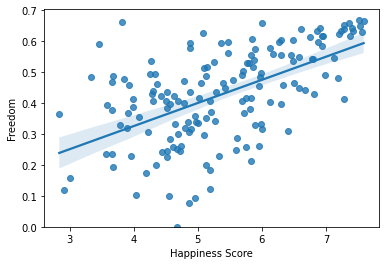

In [60]:
sns.regplot(x="Happiness Score", y="Freedom", data=Happy)
plt.ylim(0,)

In [61]:
Happy[['Happiness Score','Freedom']].corr()

,Happiness Score,Freedom
Happiness Score,1.000000,0.568211
Freedom,0.568211,1.000000


(0.0, 1.5005463912714143)

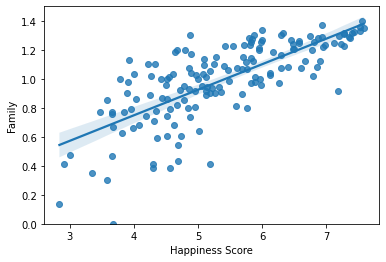

In [62]:
sns.regplot(x="Happiness Score", y="Family", data=Happy)
plt.ylim(0,)

In [63]:
Happy[['Happiness Score','Family']].corr()

,Happiness Score,Family
Happiness Score,1.000000,0.740605
Family,0.740605,1.000000


In [64]:
pearson_coef, p_value = stats.pearsonr(Happy['Happiness Score'], Happy['Freedom'])
print('The Pearson Correlation Coefficient is', pearson_coef,'with a P-value')

The Pearson Correlation Coefficient is 0.5682109041925176 with a P-value


In [65]:
pearson_coef, p_value = stats.pearsonr(Happy['Happiness Score'], Happy['Family'])
print('The Pearson Correlation Coefficient is', pearson_coef,'with a P-value')

The Pearson Correlation Coefficient is 0.7406051972367851 with a P-value


In [66]:
Happy.dtypes

Unnamed: 0             int64
Country               object
Region                object
Happiness Rank       float64
Happiness Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
year                   int64
dtype: object

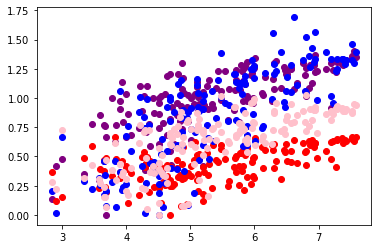

In [67]:
plt.scatter(Happy['Happiness Score'], Happy['Family'], c=['purple'])
plt.scatter(Happy['Happiness Score'], Happy['Freedom'], c='red')
plt.scatter(Happy['Happiness Score'], Happy['Economy'], c='blue')
plt.scatter(Happy['Happiness Score'], Happy['Health'], c='pink')


In [77]:
lm = LinearRegression()
lm

X = Happy[['Family']]
Y = Happy[['Happiness Score']]
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5] 


array([[6.49178477],
       [6.65592448],
       [6.52625037],
       [6.43399962],
       [6.40803366]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


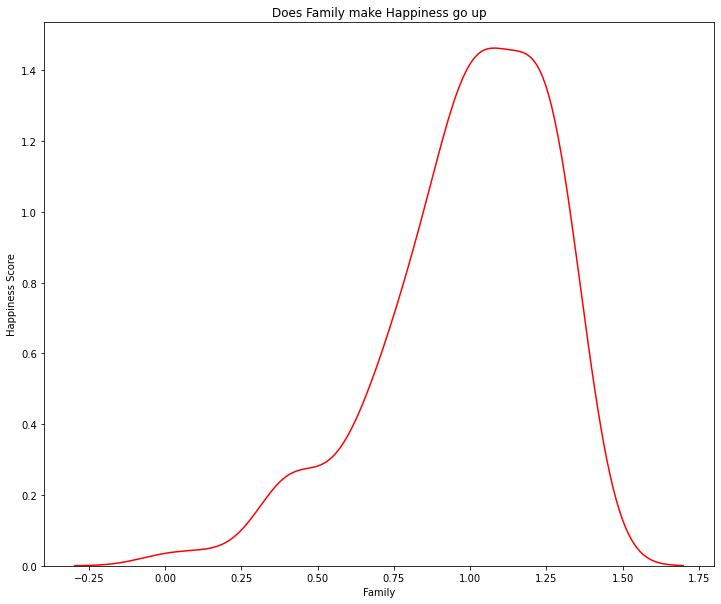

In [81]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Happy['Family'], hist=False, color="r", label="Actual Value")
sns.distplot(hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Does Family make Happiness go up')
plt.xlabel('Family')
plt.ylabel('Happiness Score')

plt.show()
plt.close()

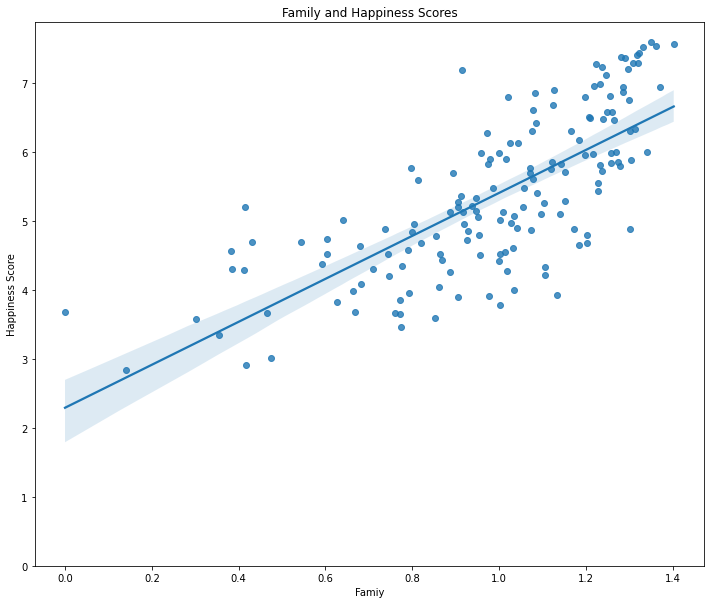

In [83]:
plt.figure(figsize=(width, height))
sns.regplot(x="Family", y="Happiness Score", data=Happy)
plt.ylim(0,)

plt.title('Family and Happiness Scores')
plt.xlabel('Famiy')
plt.ylabel('Happiness Score')


plt.show()
plt.close()